In [129]:
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.decomposition import FastICA

%config InlineBackend.figure_format = 'retina'

In [130]:
import os

data_path = "breast_cancer_dataset/"

files = os.listdir(data_path)
print(files)

['wdbc.data', 'wdbc.names']


In [131]:
import pandas as pd

data_path = "breast_cancer_dataset/"
df = pd.read_csv(data_path + "wdbc.data", header=None)
print(df.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [132]:
data_no_class_labels = df.drop(columns=[0, 1])
print("\nDataset without the first two attributes:")
print(data_no_class_labels.head())


Dataset without the first two attributes:
      2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

 

In [133]:
data_no_class_labels

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [134]:
scaler = StandardScaler(with_mean=True, with_std=True)
data_standardized = scaler.fit_transform(data_no_class_labels)
print(data_standardized)
print(data_standardized.shape)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
(569, 30)


In [135]:
data_standardized_df = pd.DataFrame(data_standardized, columns=data_no_class_labels.columns)
data_standardized_df.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [136]:
pca = PCA(n_components=2,svd_solver='randomized')
df_2d = pca.fit_transform(data_standardized)
explained_variances = pca.explained_variance_ratio_
print(explained_variances)

[0.44272026 0.18971182]


In [137]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [138]:
df_2d

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [139]:
class_labels = df[[1]]
class_labels

,1
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [140]:
data_df_2d = pd.DataFrame(df_2d, columns=['pc1', 'pc2'])
data_df_2d['class_label'] = class_labels

In [141]:
data_df_2d

,pc1,pc2,class_label
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


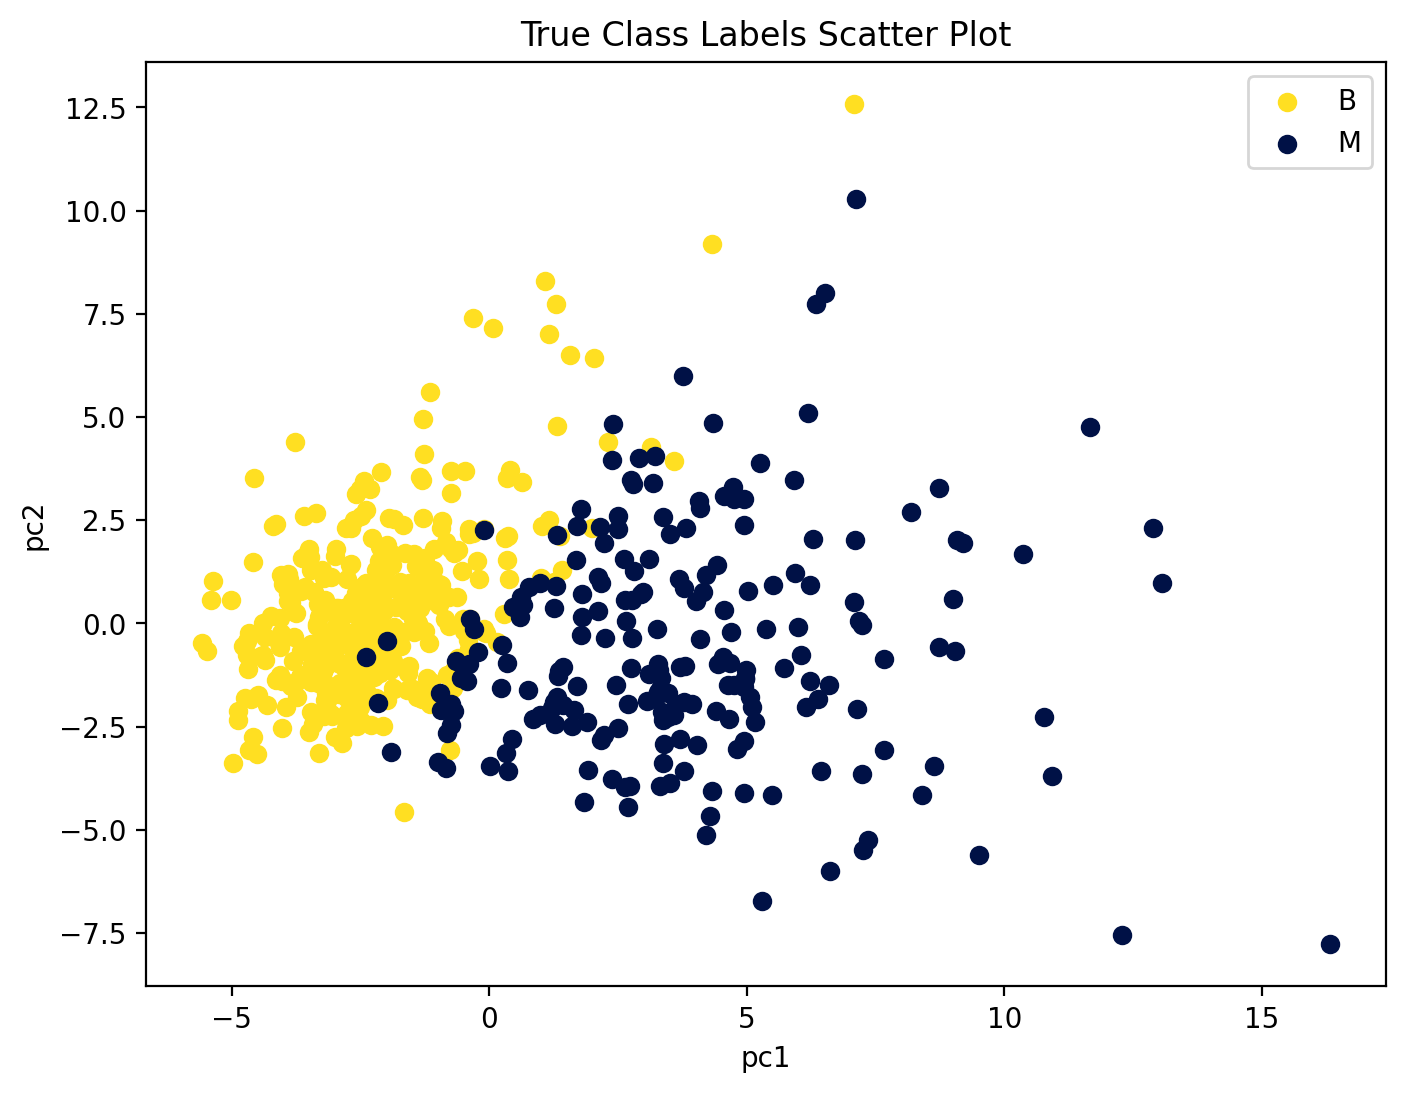

In [173]:
plt.figure(figsize=(8, 6))

M = data_df_2d[data_df_2d['class_label'] == 'M']
B = data_df_2d[data_df_2d['class_label'] == 'B']

plt.scatter(B['pc1'], B['pc2'], color='xkcd:sun yellow', label='B')
plt.scatter(M['pc1'], M['pc2'], color='xkcd:navy blue', label='M')

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('True Class Labels Scatter Plot')
plt.legend()
plt.show()

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.stats import multivariate_normal    

import imageio.v3 as iio

In [144]:
# X = df_2d
# gm = GaussianMixture(n_components=2, random_state=42).fit(X)

In [145]:
data_df_2d

,pc1,pc2,class_label
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

import h5py
import imageio
from PIL import Image 

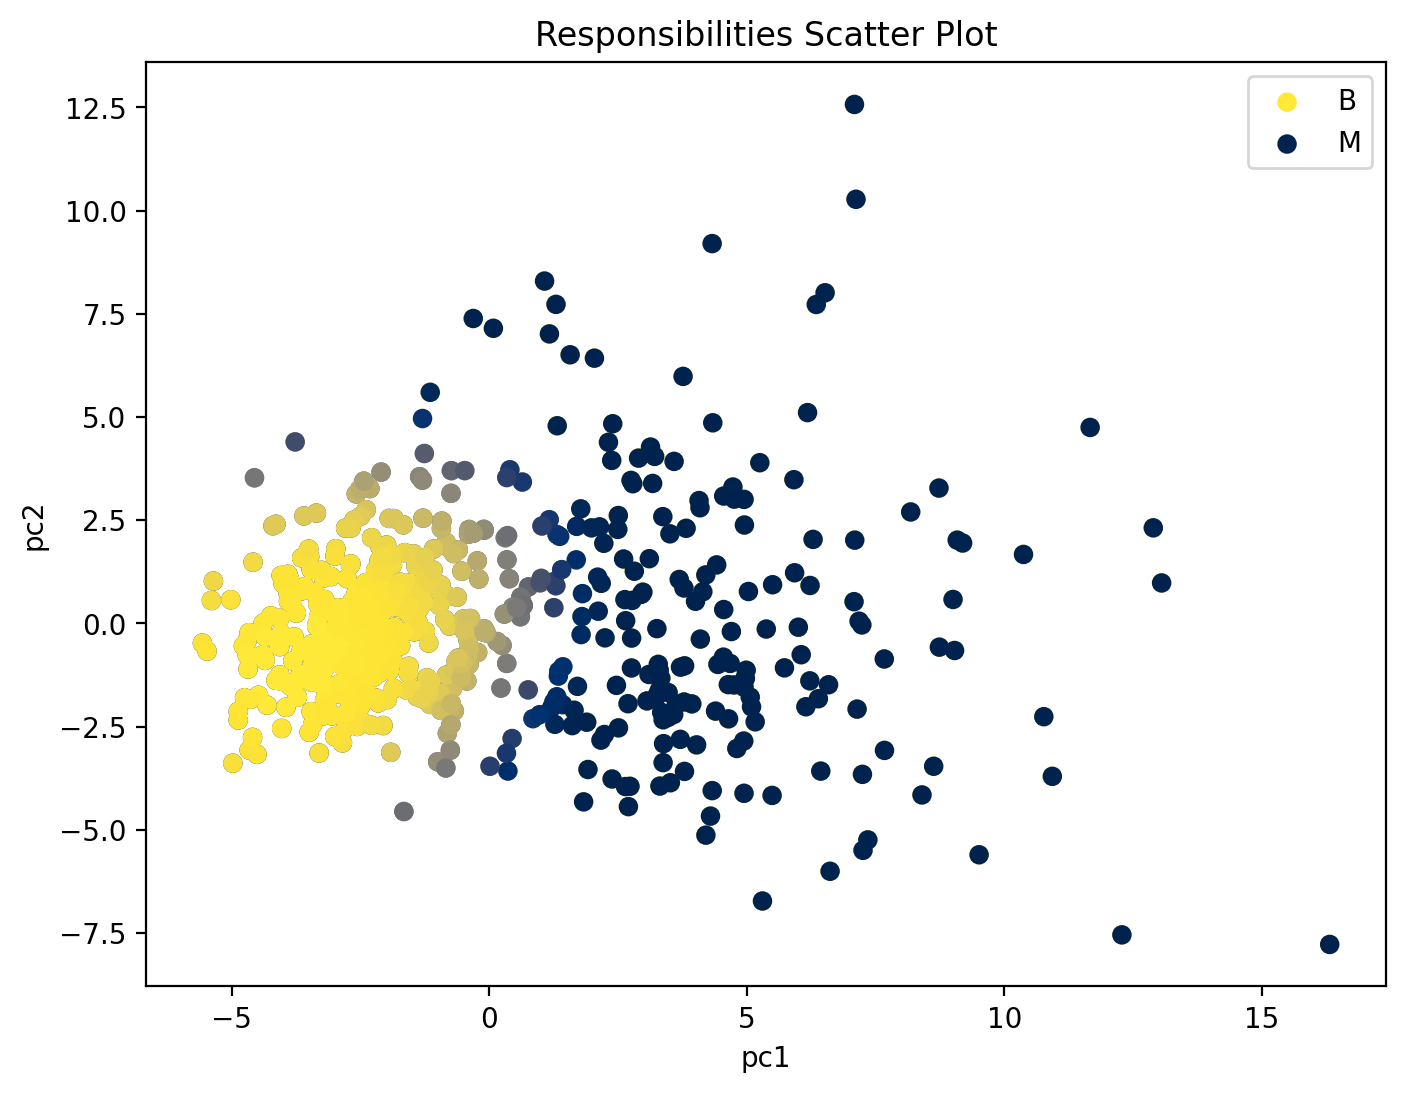

In [147]:
X = df_2d
gm = GaussianMixture(n_components=2, random_state=42).fit(X)
responsibilities = gm.predict_proba(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=responsibilities[:, 0], label='B', cmap='cividis')
plt.scatter(X[:, 0], X[:, 1], c=responsibilities[:, 1], label='M', cmap='cividis')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Responsibilities Scatter Plot')
plt.legend()
plt.show()

In [148]:
test_set = data_standardized_df.iloc[-119:]
test_set

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
450,-0.641103,0.523672,-0.623580,-0.633919,-2.151351,0.039021,-0.012923,-0.646375,-1.688994,0.470983,...,-0.720479,0.407562,-0.707450,-0.656375,-1.656935,0.544758,0.238012,-0.412736,-0.963802,0.863056
451,1.551487,1.328837,1.471766,1.524754,0.486752,-0.106715,0.962975,1.075889,-0.542598,-1.259911,...,1.070784,0.860267,0.969195,0.950006,0.895629,-0.443803,0.602144,0.487156,-0.983215,-1.276549
452,-0.604181,2.080480,-0.626051,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,...,-0.658355,1.987146,-0.660984,-0.627369,-0.507120,-0.436806,-0.436999,-0.661538,-0.734077,-0.111154
453,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,...,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951
454,-0.428092,-0.497911,-0.467469,-0.460714,-0.749392,-0.948351,-0.742492,-0.675780,-0.046070,-0.643253,...,-0.399502,-0.574386,-0.465887,-0.434351,-0.432599,-0.652457,-0.400538,-0.245091,0.597356,-0.589947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [149]:
class_labels_test = df.iloc[-119:, 1]
class_labels_test

450    B
451    M
452    B
453    B
454    B
      ..
564    M
565    M
566    M
567    M
568    B
Name: 1, Length: 119, dtype: object

In [150]:
train_set = data_standardized_df.iloc[:450]
train_set

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.607021,1.303239,-0.591451,-0.607469,0.472519,-0.230469,-0.431757,-0.159385,0.030600,0.808373,...,-0.681134,0.762561,-0.678558,-0.644597,-0.055610,-0.458434,-0.533909,0.085174,-0.488175,-0.079567
446,1.028901,2.033938,1.043388,0.929199,0.256887,0.512808,1.016961,0.877275,-0.360051,-0.515669,...,1.089422,2.094623,1.135996,0.978132,0.338913,0.775677,1.764105,1.254577,0.115258,0.377059
447,0.191059,-0.379230,0.161093,0.056629,-0.325246,-0.292629,-0.604011,-0.678876,0.297119,-0.558197,...,0.033301,-0.478309,-0.040545,-0.089800,-0.428215,-0.420902,-0.317541,-0.480037,1.131224,-0.614884
448,0.114375,0.011717,0.093953,0.013683,-0.888165,-0.499201,-0.007901,-0.507346,-1.236277,-0.756662,...,0.006380,0.441759,0.024984,-0.088042,-1.028767,0.067653,0.507153,-0.284223,-0.695250,-0.516244


In [151]:
class_labels_tr = df.iloc[:450, 1]
class_labels_tr

0      M
1      M
2      M
3      M
4      M
      ..
445    B
446    M
447    B
448    B
449    M
Name: 1, Length: 450, dtype: object

In [152]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(C=4, kernel=kernel)
    svm.fit(train_set, class_labels_tr)
    accuracy = svm.score(test_set, class_labels_test)
    accuracies.append(accuracy)
    print(f'SVC accuracy for {kernel} kernel on test set: {accuracy}')

SVC accuracy for linear kernel on test set: 0.9747899159663865
SVC accuracy for poly kernel on test set: 0.9831932773109243
SVC accuracy for rbf kernel on test set: 0.9831932773109243
SVC accuracy for sigmoid kernel on test set: 0.907563025210084


In [153]:
reg_accuracies = []
Cs = range(1, 6)
for i in Cs:
    svm = SVC(C=i, kernel='rbf')
    svm.fit(train_set, class_labels_tr)
    accuracy = svm.score(test_set, class_labels_test)
    reg_accuracies.append(accuracy)
    print(f'SVC accuracy for {i} C with linear kernel on test set: {accuracy}')

SVC accuracy for 1 C with linear kernel on test set: 0.9747899159663865
SVC accuracy for 2 C with linear kernel on test set: 0.9831932773109243
SVC accuracy for 3 C with linear kernel on test set: 0.9831932773109243
SVC accuracy for 4 C with linear kernel on test set: 0.9831932773109243
SVC accuracy for 5 C with linear kernel on test set: 0.9831932773109243


In [154]:
data_df_2d_no_class_labels = data_df_2d.drop(columns=['class_label'])

In [155]:
train_set_2d = data_df_2d_no_class_labels.iloc[:450]
train_set_2d

,pc1,pc2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
445,-1.257252,1.067692
446,3.245414,-1.778359
447,-1.557219,-1.037927
448,-1.249258,-1.588839


In [156]:
test_set_2d = data_df_2d_no_class_labels.iloc[-119:]
test_set_2d

,pc1,pc2
450,-1.077451,1.803618
451,2.511753,-2.528808
452,-2.217092,0.029891
453,-1.173831,-0.474840
454,-2.836301,-1.018126
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [157]:
class_labels_2d = data_df_2d.iloc[:450,2]
class_labels_2d

0      M
1      M
2      M
3      M
4      M
      ..
445    B
446    M
447    B
448    B
449    M
Name: class_label, Length: 450, dtype: object

In [158]:
class_labels_test_2d = data_df_2d.iloc[-119:,2]
class_labels_test_2d

450    B
451    M
452    B
453    B
454    B
      ..
564    M
565    M
566    M
567    M
568    B
Name: class_label, Length: 119, dtype: object

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
class_labels

,1
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [161]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(C=4, kernel=kernel)
    svm.fit(train_set_2d, class_labels_2d)
    accuracy = svm.score(test_set_2d, class_labels_test_2d)
    accuracies.append(accuracy)
    print(f'SVC accuracy for {kernel} kernel on test set: {accuracy}')

SVC accuracy for linear kernel on test set: 0.9495798319327731
SVC accuracy for poly kernel on test set: 0.9663865546218487
SVC accuracy for rbf kernel on test set: 0.957983193277311
SVC accuracy for sigmoid kernel on test set: 0.8991596638655462


In [162]:
# 2D PCA
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(C=4, kernel=kernel)
    svm.fit(train_set_2d, class_labels_2d)
    accuracy = svm.score(test_set_2d, class_labels_test_2d)
    accuracies.append(accuracy)
    print(f'SVC accuracy for {kernel} kernel on test set: {accuracy}')

SVC accuracy for linear kernel on test set: 0.9495798319327731
SVC accuracy for poly kernel on test set: 0.9663865546218487
SVC accuracy for rbf kernel on test set: 0.957983193277311
SVC accuracy for sigmoid kernel on test set: 0.8991596638655462


In [163]:
for i in range(1, 6):
    svm = SVC(C=i, kernel='poly')
    svm.fit(train_set_2d, class_labels_2d)
    accuracy = svm.score(test_set_2d, class_labels_test_2d)
    accuracies.append(accuracy)
    print(f'SVM classifier accuracy for {i} C with linear kernel: {accuracy}')

SVM classifier accuracy for 1 C with linear kernel: 0.9663865546218487
SVM classifier accuracy for 2 C with linear kernel: 0.9663865546218487
SVM classifier accuracy for 3 C with linear kernel: 0.9663865546218487
SVM classifier accuracy for 4 C with linear kernel: 0.9663865546218487
SVM classifier accuracy for 5 C with linear kernel: 0.9663865546218487


In [164]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1, 1, 10, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters,verbose=2)
clf.fit(train_set, class_labels_tr)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=2)

In [165]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [166]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1, 1, 10, 100]}
svc = SVC()
clf = GridSearchCV(svc, parameters,verbose=2)
clf.fit(train_set_2d, class_labels_2d)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=2)

In [167]:
clf.best_params_

{'C': 100, 'kernel': 'rbf'}